> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt # To deal with data time data

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [165]:
df_gun=pd.read_excel("C:\\Users\\hp\\Desktop\\ncis-and-census-data\\gun_data.xlsx", index_col='month', parse_dates=True)
df_gun.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,
2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [166]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [167]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12485 entries, 2017-09-01 to 1998-11-01
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      12485 non-null  object 
 1   permit                     12461 non-null  float64
 2   permit_recheck             1100 non-null   float64
 3   handgun                    12465 non-null  float64
 4   long_gun                   12466 non-null  float64
 5   other                      5500 non-null   float64
 6   multiple                   12485 non-null  int64  
 7   admin                      12462 non-null  float64
 8   prepawn_handgun            10542 non-null  float64
 9   prepawn_long_gun           10540 non-null  float64
 10  prepawn_other              5115 non-null   float64
 11  redemption_handgun         10545 non-null  float64
 12  redemption_long_gun        10544 non-null  float64
 13  redemption_other           51

In [168]:
df_gun.shape

(12485, 26)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [170]:
df_gun.drop(['admin',"prepawn_handgun", "prepawn_long_gun", "prepawn_other","redemption_handgun","redemption_long_gun","redemption_other","returned_handgun","returned_long_gun","returned_other","rentals_handgun","rentals_long_gun","private_sale_handgun","private_sale_long_gun","private_sale_other","return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other", "permit","permit_recheck"],axis=1, inplace=True)

In [171]:
df_gun.head()

,state,handgun,long_gun,other,multiple,totals
month,,,,,,
2017-09-01,Alabama,5734.0,6320.0,221.0,317,32019
2017-09-01,Alaska,2320.0,2930.0,219.0,160,6303
2017-09-01,Arizona,11063.0,7946.0,920.0,631,28394
2017-09-01,Arkansas,4347.0,6063.0,165.0,366,17747
2017-09-01,California,37165.0,24581.0,2984.0,0,123506


In [172]:
df_gun[df_gun.isnull() == True]

,state,handgun,long_gun,other,multiple,totals
month,,,,,,
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1998-11-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-01,NaN,NaN,NaN,NaN,NaN,NaN
1998-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
df_gun.dropna(axis=0, inplace=True)

In [174]:
df_gun.shape

(5500, 6)

In [175]:
df_gun.isnull().sum()

state       0
handgun     0
long_gun    0
other       0
multiple    0
totals      0
dtype: int64

In [176]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


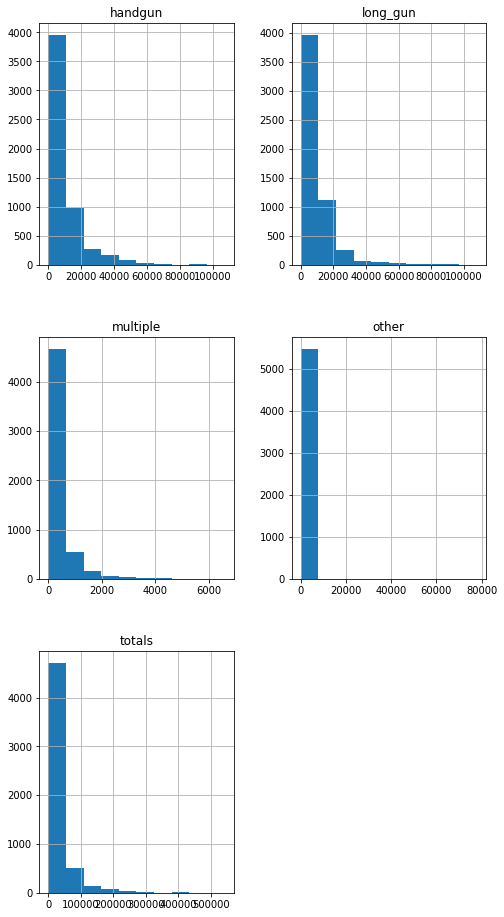

In [177]:
df_gun.hist(figsize=(8,16));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which state issued highest no. of guns? What type of guns were mostly issued in that state?

In [178]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [179]:
df_gun.groupby("state").mean()

,handgun,long_gun,other,multiple,totals
state,,,,,
Alabama,13274.02,12844.55,395.78,630.83,41406.28
Alaska,2746.96,3066.42,159.70,172.83,6687.55
Arizona,10652.61,7681.38,568.32,502.16,26113.36
Arkansas,5446.95,6812.10,130.53,332.02,19615.97
California,33710.54,31799.54,3426.35,0.00,114469.10
Colorado,15470.61,13207.46,604.79,1691.80,34863.51
Connecticut,6336.38,3866.29,168.77,0.34,20382.07
Delaware,1455.35,1299.07,55.71,57.35,3137.16
District of Columbia,40.29,2.21,0.01,0.34,46.70


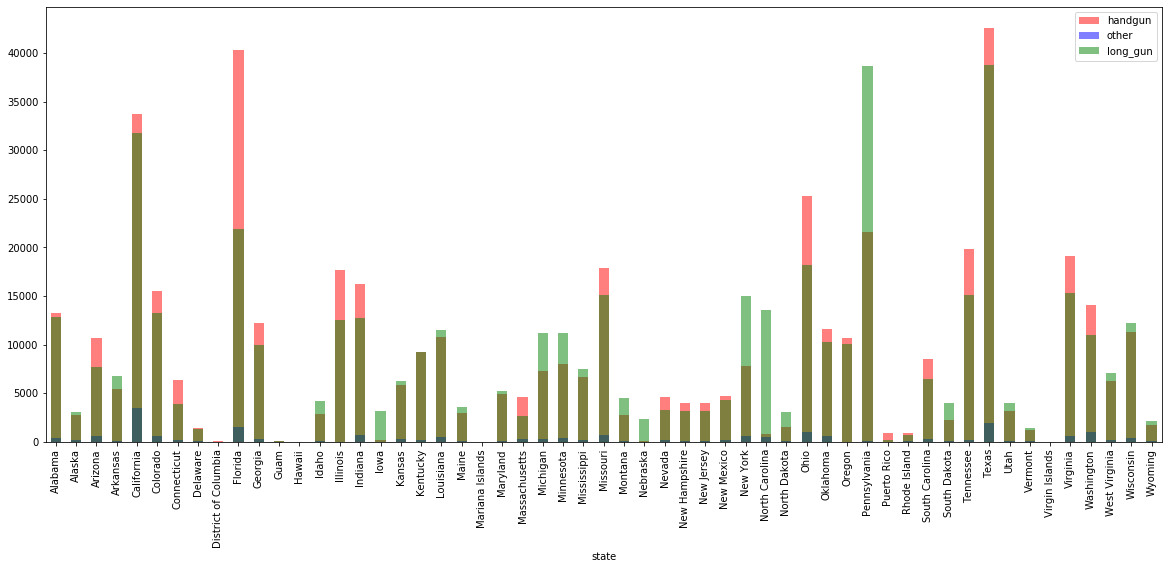

In [185]:
df_gun.groupby("state").handgun.mean().plot(kind='bar', alpha=0.5, color='red', figsize=(20,8));
df_gun.groupby("state").other.mean().plot(kind='bar', alpha=0.5, color='blue');
df_gun.groupby("state").long_gun.mean().plot(kind='bar', alpha=0.5, color='green');
plt.legend();

### Research Question 2  (Replace this header name!)

In [187]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [261]:
df_cen=pd.read_csv("C:\\Users\\hp\\Desktop\\ncis-and-census-data\\U.S. Census Data.csv")
df_cen.shape

(85, 52)

In [262]:
df_cen.drop(['Fact Note', 'Fact'], axis=1, inplace=True)
df_cen.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [268]:
df=pd.Series(df_cen.loc[np.r_[0,:]],index=[5,6])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: hist method requires numerical columns, nothing to plot.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [182]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295